In [1]:
import numpy as np
import pandas as pd
try:
    from skmisc.loess import loess
except ImportError:
    from util import loess
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

Now, we can load the data at data.csv and turn it into the predictor X and the target y

In [2]:
# X is contained in the first column of the data, y in the second.
X = pd.read_csv('data.csv', header = None, usecols = [0])
y = pd.read_csv('data.csv', header = None, usecols = [1])
X, y = X.to_numpy().ravel(), y.to_numpy().ravel()

Create a scatterplot of the data. 

Text(0.5, 1.0, 'Scatter Plot of the data')

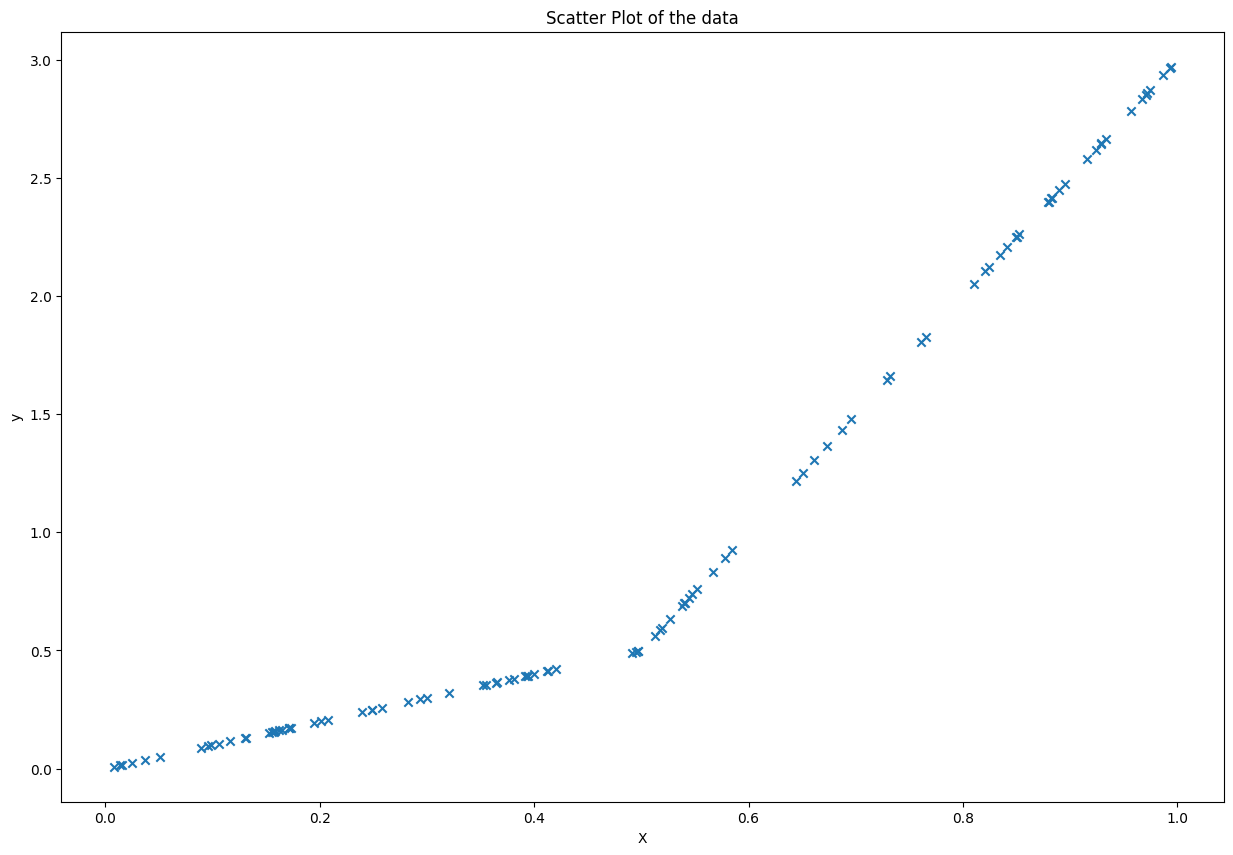

In [3]:
plt.figure()
plt.scatter(X, y, marker='x')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Scatter Plot of the data')

*Problem 4.1*
* The graph is divided into 2 parts: from 0 to 0.5 (X=y in this part) and from 0.5 to 1. 
* 2 variables have perfect positive correlation, linear relationship in both parts. 

We now define the kernels $K_1,...,K_4$ as

In [4]:
def K1(x, x_):
    return 1

def K2(x, x_, lam):
    return pow(1 - pow(abs((x-x_)/lam), 3), 3)

def K3(x, x_, lam):
    return np.exp(-lam * pow(abs(x-x_), 2))

def K4(x, x_, L):
    for l in range (1, L+1):
        if (l-1)/L <= x < l/L and (l-1)/L <= x_ < l/L:
            return 1
    return 0

To write the function which takes $X, y$ and a kernel $K$ as input, we can do the following

In [5]:
def pred(X, y, K):
    from sklearn.metrics.pairwise import pairwise_kernels
    # Start by computing the matrix of all weights we'll need at once.
    k = pairwise_kernels(X.reshape(-1, 1), y.reshape(-1, 1), metric=K)
    print('X.shape is ', X.shape)
    print('y.shape is ', y.shape)
    print('k.shape is ', k.shape)
    # Now, for each point we can compute the model using the corresponding weights, and make a prediction.
    loess_model = loess(x=X, y=y, weights=k)
    y_hat = []
    for x in X:
        y_hat.append(loess_model.predict(x))
    # Return a vector of the predictions at each point in X.
    return y_hat

To actually use this function and show the fits of each kernel, we can iterate over all the kernels and fit the LOESS model for each of them.

X.shape is  (100,)
y.shape is  (100,)
k.shape is  (100, 100)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 100 is different from 1)

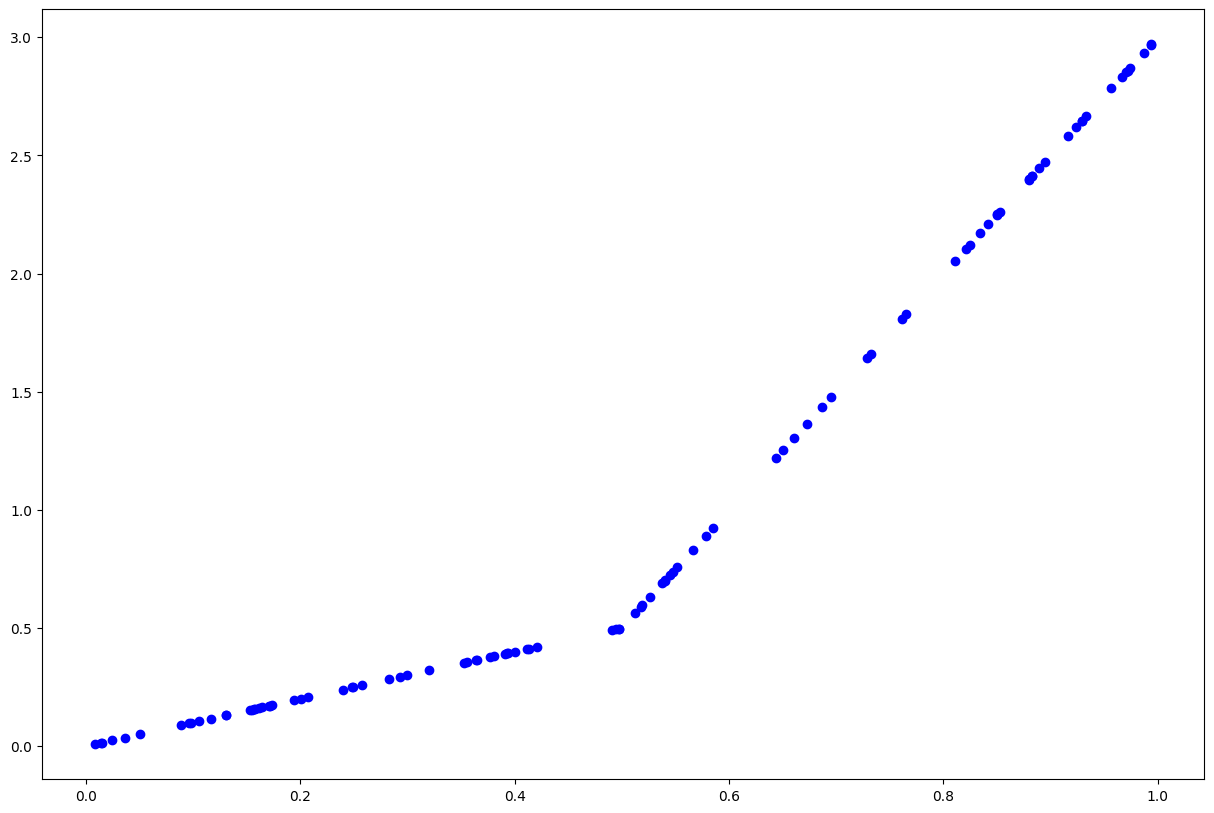

In [6]:
from functools import partial # You may want to use this to make your life easier.
plt.scatter(X, y, c='b')
plt.scatter(X, pred(X, y, K1), color='m', label='K1')
plt.scatter(X, pred(X, y, partial(K2, lam = 1)), color='r', label='K2')
plt.scatter(X, pred(X, y, partial(K3, lam = 1)), color='g', label='K3')
plt.scatter(X, pred(X, y, partial(K4, L = 2)), color='y', label='K4')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Predictions of each model')    
# Adding a legend so we know which kernel produced what is good style.
plt.legend()
plt.show()